### 2-1 : 퍼셉트론

---

#### 1. 인공 뉴런의 수학적 정의  

두개의 클래스(양성: 1, 음성: -1)가 있는 이진 분류(Binary Classification) 작업을 하는 퍼셉트론

최종 입력(new input) $z=w_1x_1+...+w_mx_m$   
   
$\boldsymbol{w}=\begin{bmatrix} w_1 \\ \vdots \\ w_m \end{bmatrix}, \boldsymbol{x}=\begin{bmatrix} x_1 \\ \vdots \\ x_m \end{bmatrix}$
  
특정 샘플 $\boldsymbol{x}^{(i)}$의 최종 입력이 임계 값 $\theta$ 보다 크면 클래스 1로 예측하고, 그렇지 않으면 클래스 -1로 예측한다

결정 함수 $\phi(\cdot)$는 단위 계단 함수(Unit Step Function)의 변형이다.  

$\phi(z)=\begin{cases} 1, & z\ge\theta \\ -1, & else \end{cases}$
  
$w_0 = -\theta$ 이고 $x_0 = 1$인 0번째 가중치를 정의하면,  
$z = w_0x_0 + w_1x_1 + ... + w_mx_m = \boldsymbol{w}^{T}\boldsymbol{x}$  
  
$\phi(z)=\begin{cases} 1, & z \ge 0 \\ -1, & else \end{cases}$  

절편(intercept) : $w_0 = -\theta$
  
    
#### 2. 퍼셉트론 학습 규칙
  
1. 가중치를 0 or 랜덤한 작은 값으로 초기화
2. 각 훈련 샘플 $\boldsymbol{x}^{(i)}$에서 출력값 $\hat{(y)}$ 계산, 가중치 업데이트  

가중치 업데이트: 
$$w_j := w_j + \vartriangle\!w_j$$  
$$\vartriangle\!w_j = \eta(y^{(i)}-\hat{y}^{(i)})x^{(i)}_j$$  

$\eta$ : 학습률(learning rate, 0.0~1,0 실수)  
$y^{(i)}$ : 진짜 클래스 레이블(true class label), 실제 샘플
$\hat{y}^{(i)}$ : 예측 클래스 레이블(predicted class label), 퍼셉트론이 예측한 레이블

#### 3. 퍼셉트론 구현

OOP를 사용해 퍼셉트론 클래스를 구현했다. Perceptron객체 초기화 후 fit 메서드로 학습, predict 메서드로 예측을 만든다.


In [9]:
import numpy as np

class Perceptron(object):
  """퍼셉트론 분류기

  매개변수
  ------------
  eta : float
    learning rate(0.0 ~ 1.0)

  n_iter : int
    훈련 데이터셋 반복 횟수

  random_state : int
    가중치 무작위 초기화를 위한 난수 생성기 시드


  속성
  ------------
  w_ : 1d-array
    학습된 가중치

  errors_ : list
    epoch마다 누적된 분류 오류

  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self,X,y):
    """훈련 데이터 학습

    매개변수
    ------------
    X : {array-like}, shape = [n_samples, n_features]
     n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
    
    y : array-like, shape = [n_samples]
     타깃 값
    """
    rgen = np.random.RandomState(seed = self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi,target in zip(X,y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)

    return self

  def new_input(self, X):
    """최종 입력 계산"""
    return np.dot(X, self.w_[1:]) + self.w_[0]
    
  def predict(self, X):
    """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
    return np.where(self.new_input(X) >= 0.0, 1, -1)

      


fit 메서드를 따로 놓고 보자.  

```python
def fit(self,X,y):
    rgen = np.random.RandomState(seed = self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi,target in zip(X,y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)

    return self
```  

self.w_ 가중치를 $\mathbb{R}^{m+1}$로 초기화한다. $m$은 데이터셋에 있는 차원의 개수이다.  
intercept(self.w_[0])를 위해 +1을 더한다.  
`rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])`: sigma가 0.01인 정규 분포에서 뽑은 랜덤한 작은 수를 담는다. rgen은 numpy의 난수 생성기로 지정한 seed를 이용해 난수를 생성한다.

self.w_[1:] += update * xi : $\vartriangle\!w_j = \eta(y^{(i)}-\hat{y}^{(i)})x^{(i)}_j$


#### 4. 붓꽃 데이터셋에서 퍼셉트론 훈련

pandas 라이브러리를 이용해 DataFrame객체로 붓꽃 데이터셋을 load한다.

In [14]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


클래스 레이블을 정수 클래스 versicolor: 1, setosa: -1 로 바꾼 후 y에 저장
첫 열(꽃받침 길이)와 세번째 열(꽃잎 길이)를 특성 행렬 X에 저장
scatter plot(2차원 산점도)로 시각화

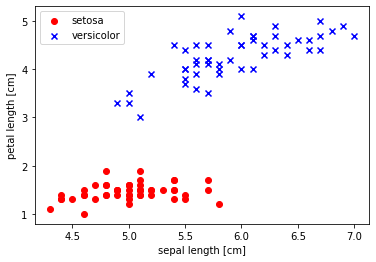

In [15]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values #iloc: pandas의 함수로, 특정 행,열을 선택
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0,2]].values

plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


위 데이터를 이용해 퍼셉트론 알고리즘을 훈련한다.

<function matplotlib.pyplot.show(close=None, block=None)>

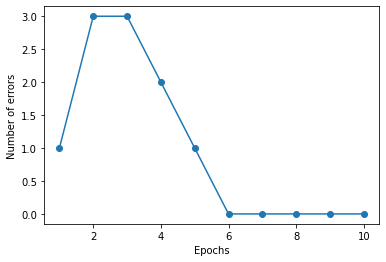

In [16]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show

퍼셉트론은 6th epoch 이후 수렴했고 training sample을 완벽하게 분류했다.  
2차원 데이터셋의 결정 경계를 시각화해보자.

In [28]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolution=0.02):
    
    # 마커와 컬러맵 설정
    markers = ('s', 'x', 'o', '^', 'v') # 사각형, 곱셈 기호, 원, 삼각형, 뒤집힌 삼각형
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) # unique: numpy함수로, 고유값 반환

    # 결정 경계(Decision Boundary) 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), \
                           np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) 
    #ravel: 1차원으로 만들어주는 numpy 함수
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap) 
    #contourf: python함수, 2차원 등고선 플롯/ alpha: 투명도/ cmap: Colormap, 레벨 값을 색에 매핑 
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #산점도 그리기
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx],label=cl, edgecolor = 'black')



두 특성의 최소 최대를 찾고 이 벡터로 meshgrid함수로 xx1, xx2쌍을 만든다. 배열을 펼치고 전치해 열이 2개가 되도록 한다.
predict메서드로 그리드 각 포인트에 대응하는 클래스 레이블 Z를 예측한다.

클래스 레이블 Z를 xx1,xx2와 같은 차원의 그리드로 크기를 변경 후, plt.contour함수로 등고선 그래프를 그린다.

/var/folders/93/wz9d35t12bggw18wk6g_80j80000gn/T/ipykernel_4080/3657750685.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx],label=cl, edgecolor = 'black')


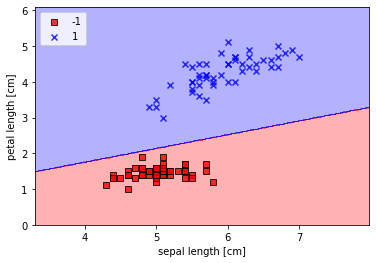

In [29]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()